<a href="https://colab.research.google.com/github/MuzhaffarRafi/BigDataMachineLearning/blob/main/Klasifikasi/BIGDATA_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOAL Sebuah Bank memerlukan pendistribusian kredit kepada nasabah agar Bank menjadi untung besar. Salah satu produk bank yang ditawarkan adalah kartu kredit. Kartu kredit jika tidak dipegang oleh nasabah yang tepat, berakibat pada macetnya pembayaran tagihan kartu kredit. Oleh sebab itu Bank memerlukan sebuah cara untuk mendeteksi calon nasabah yang akan diberi persetujuan mendapatkan kartu kredit.

Diantara alternatif solusi yang dikembangkan adalah metode Data Science yang menerapkan sebuah framework yang telah dipergunakan secara luas di dunia industri yaitu CRISP-DM framework. Framework ini selanjutnya diuraikan menjadi sebuah 11 urutan langkah2 antara lain: memahami tujuan bisnis, memahami tujuan teknis data science, memahami dan melakukan proses awal data, membuat skenario pemodelan, membuat model yang handal, mengevaluasi pemodelan, dan mereview proyek data science.

Solusi tersebut digunakan untuk mengidentifikasi factor-faktor yang berkontribusi terhadap persetujuan penerbitan kartu kredit. Hasil prediksi tersebut selanjutnya digunakan oleh bank untuk mencegah macetnya pembayaran tagihan kartu kredit.

Sumber data utama untuk keperluan pengembangan model prediktif ini adalah hasil survey menggunakan data internal bank dengan dataset nasabah yang dikumpulkan selama beberapa tahun terakhir. Dataset tersebut berisi: A1,A2…, A15. Disini A16 merupakan variable dependent nya (label yang dicari). Perlu diperhatikan, nama kolom memang sengaja dihapus agar tidak dapat dibaca oleh orang yang tidak berkepentingan.

Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk: (1) mengidentifikasi variabel kunci yang mempengaruhi persetujuan penerbitan kartu kredit, dan (2) memprediksi persetujuan penerbitan kartu kredit. Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak bank untuk memberikan persetujuan penerbitan kartu kredit.

Dataset: https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Dengan menggunakan Langkah-langkah pada Associate Data Scientist, selesaikan masalah diatas menggunakan Metode Klasifikasi.

Pengerjaan dilakukan dengan mengirimkan hasil rekaman youtube ke Kulino untuk dinilai.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [ ]:
pd.set_option('display.max_columns', None)

## BAB 1 - Mengumpulkan data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crx.data',header=None)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### Memasukkan nama fitur kedalam dataset

**silakan dirubah kolom dataset**

In [ ]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16",]

In [ ]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# BAB 2 Analisis Karakteristik Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


# Cek Deskripsi Data

In [ ]:
dataset.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


# Cek Distribusi Kelas

In [ ]:
dataset['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

( + ) = Approved  ( - ) = Decline


**temuan**: [distribusi class tidak seimbang, karena perbandingan 3:4]

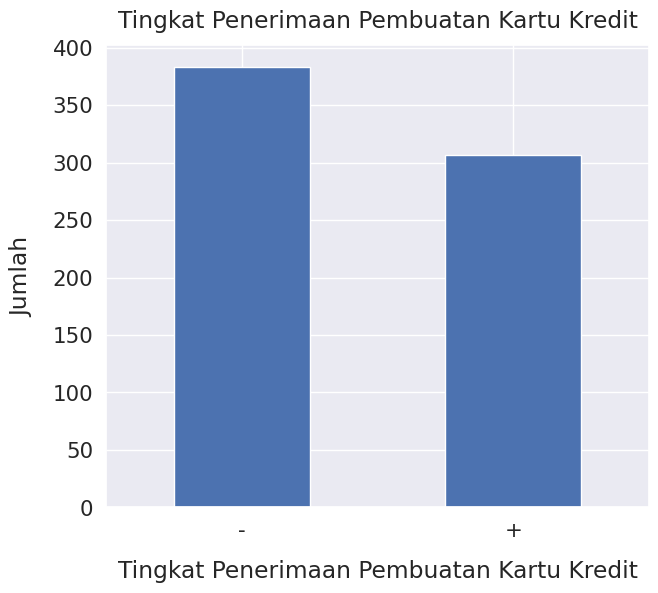

In [ ]:
sns.set(font_scale=1.4)
dataset['A16'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Tingkat Penerimaan Pembuatan Kartu Kredit", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Tingkat Penerimaan Pembuatan Kartu Kredit", y=1.02);

# Cek Distribusi A1

In [ ]:
print(dataset['A1'].value_counts())

b    468
a    210
?     12
Name: A1, dtype: int64


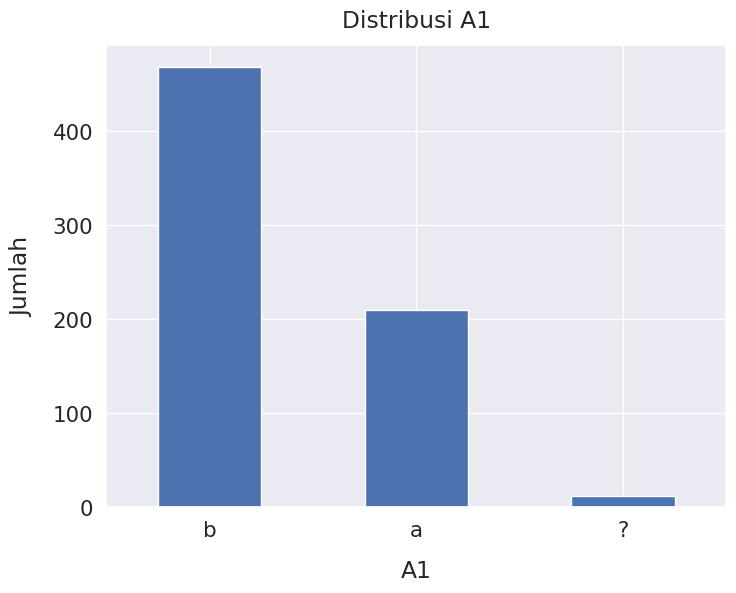

In [ ]:
sns.set(font_scale=1.4)
dataset['A1'].value_counts().plot(kind='bar', figsize=(8, 6), rot=0)
plt.xlabel("A1", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A1", y=1.02);

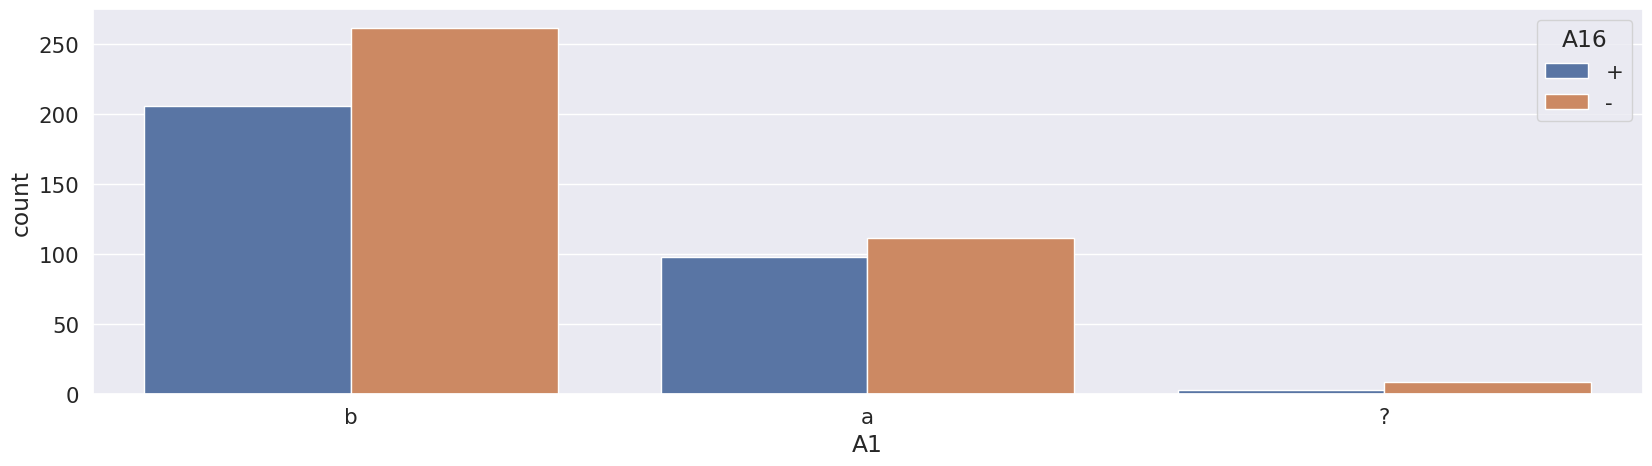

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A2

In [ ]:
print(dataset['A2'].value_counts())

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: A2, Length: 350, dtype: int64


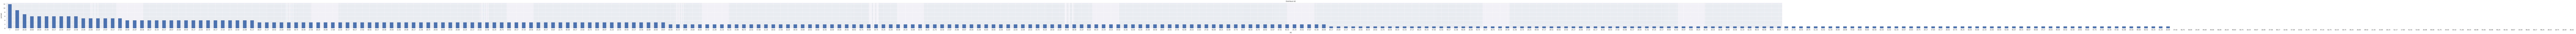

In [ ]:
sns.set(font_scale=1.4)
dataset['A2'].value_counts().plot(kind='bar', figsize=(500, 5), rot=0)
plt.xlabel("A2", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A2", y=1.02);

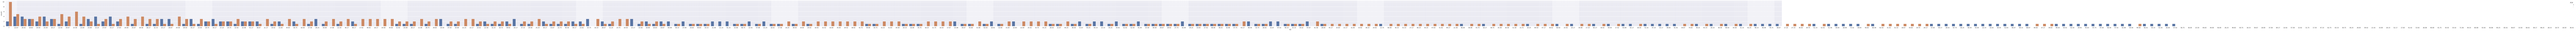

In [ ]:
plt.subplots(figsize = (500,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distibusi A3

In [ ]:
print(dataset['A3'].value_counts())

1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: A3, Length: 215, dtype: int64


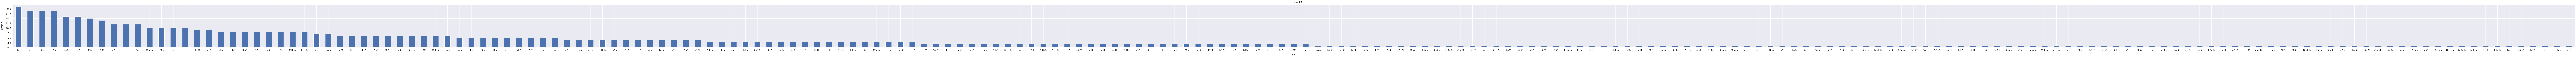

In [ ]:
sns.set(font_scale=1.4)
dataset['A3'].value_counts().plot(kind='bar', figsize=(300, 5), rot=0)
plt.xlabel("A3", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A3", y=1.02);

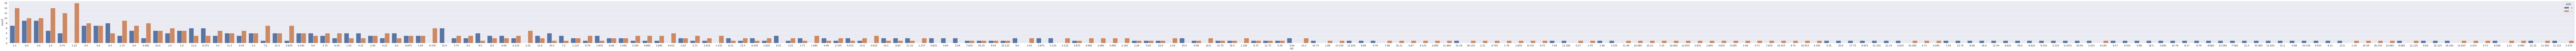

In [ ]:
plt.subplots(figsize = (300,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A4

In [ ]:
print(dataset['A4'].value_counts())

u    519
y    163
?      6
l      2
Name: A4, dtype: int64


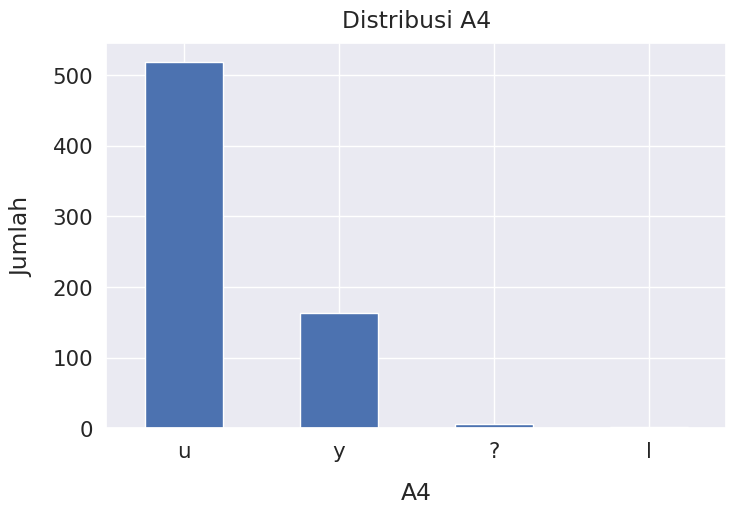

In [ ]:
sns.set(font_scale=1.4)
dataset['A4'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("A4", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A4", y=1.02);

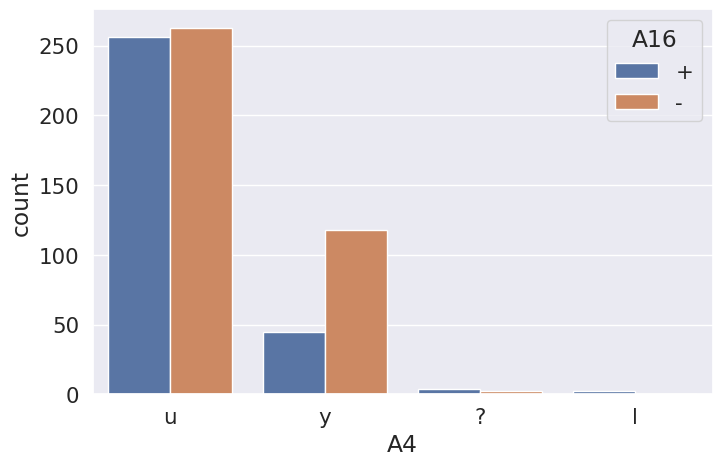

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A5

In [ ]:
print(dataset['A5'].value_counts())

g     519
p     163
?       6
gg      2
Name: A5, dtype: int64


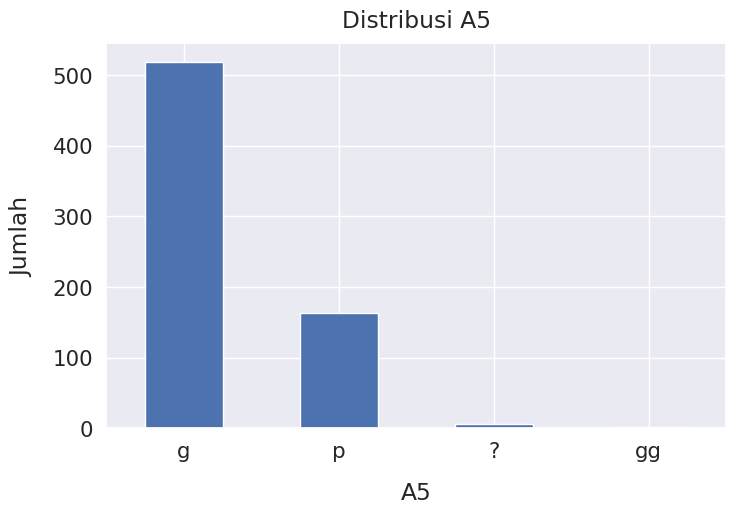

In [ ]:
sns.set(font_scale=1.4)
dataset['A5'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("A5", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A5", y=1.02);

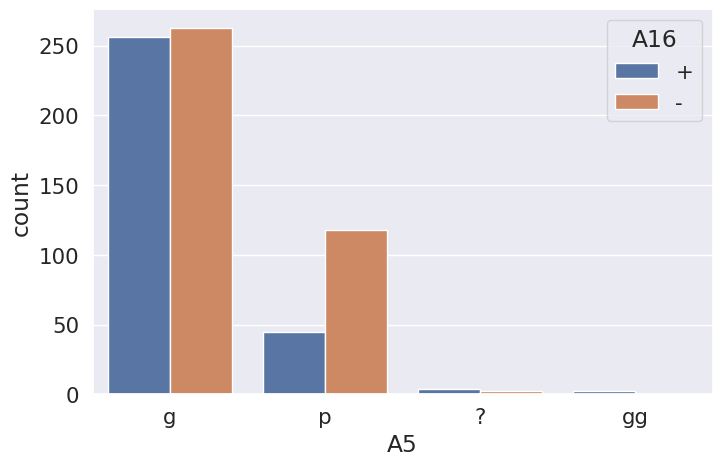

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A6

In [ ]:
print(dataset['A6'].value_counts())

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64


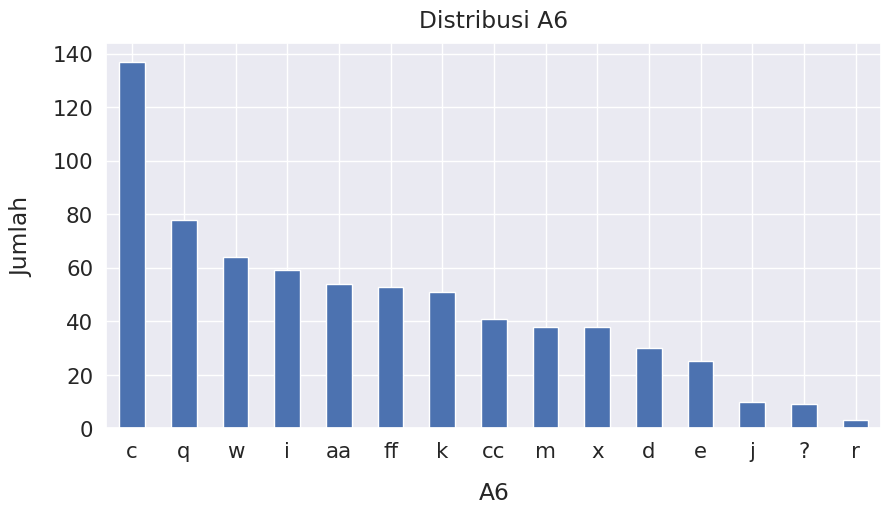

In [ ]:
sns.set(font_scale=1.4)
dataset['A6'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel("A6", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A6", y=1.02);

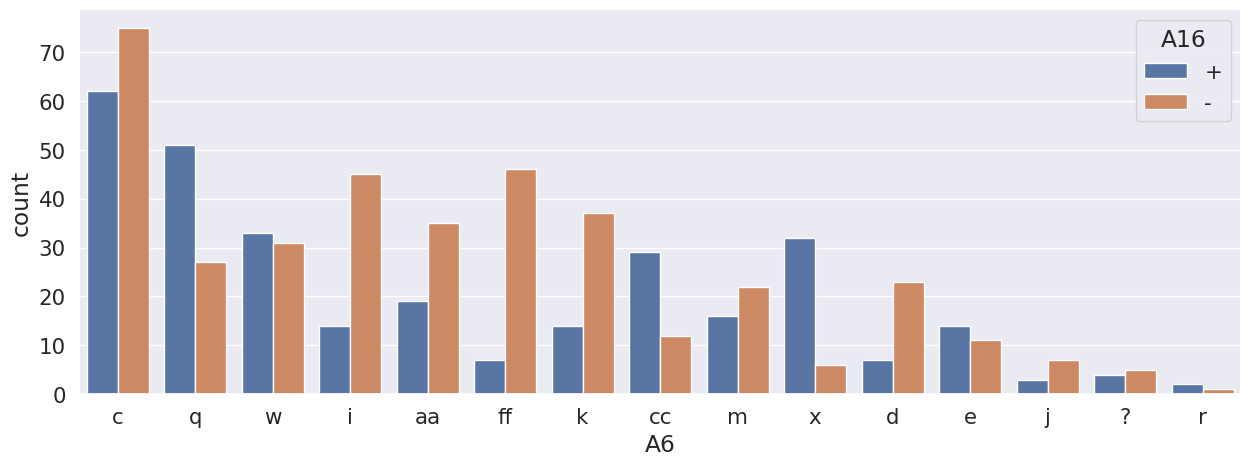

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A7

In [ ]:
print(dataset['A7'].value_counts())

v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64


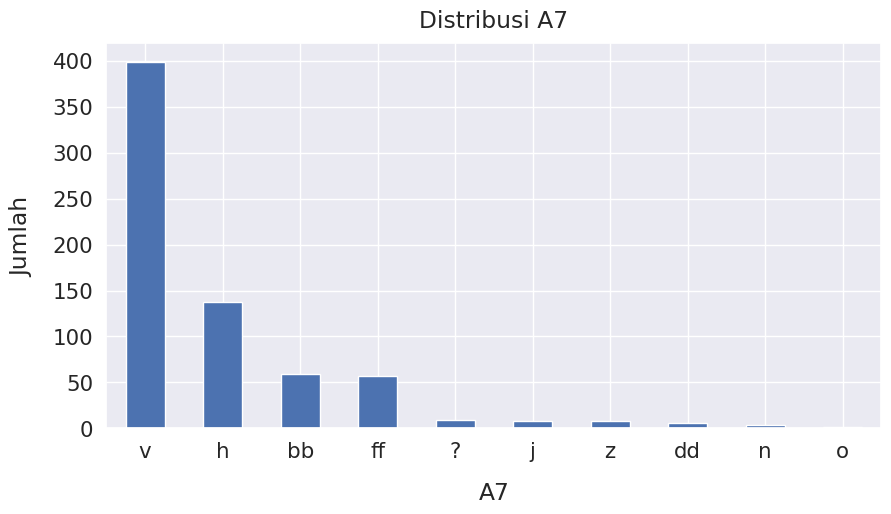

In [ ]:
sns.set(font_scale=1.4)
dataset['A7'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel("A7", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A7", y=1.02);

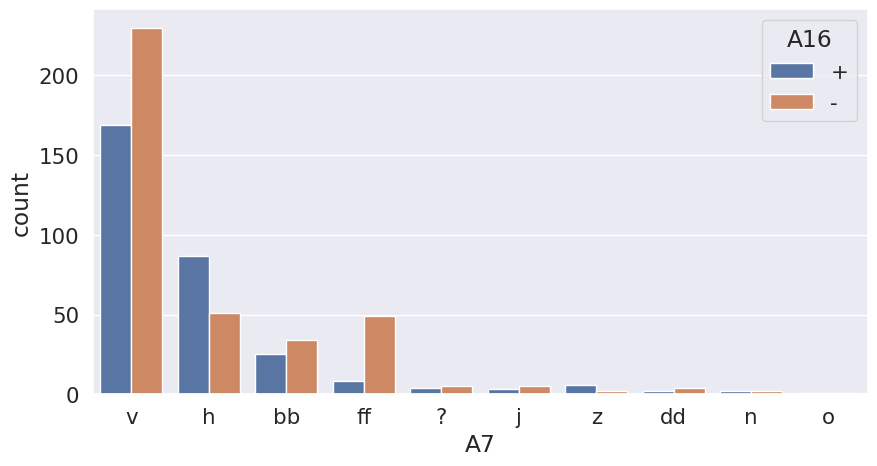

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A8

In [ ]:
print(dataset['A8'].value_counts())

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1
Name: A8, Length: 132, dtype: int64


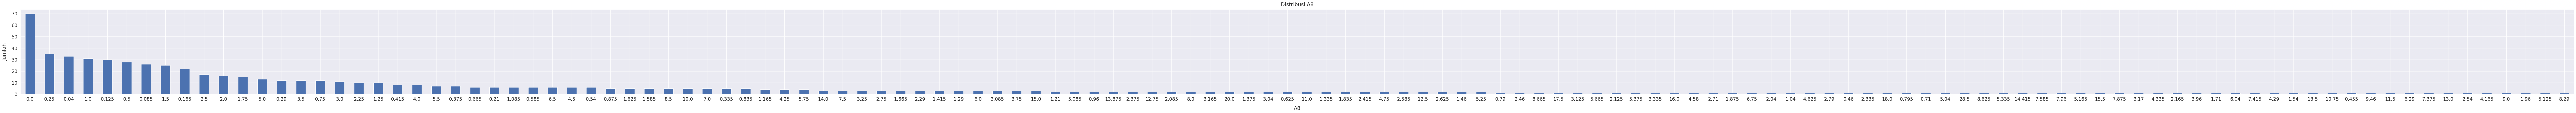

In [ ]:
sns.set(font_scale=1.4)
dataset['A8'].value_counts().plot(kind='bar', figsize=(150, 5), rot=0)
plt.xlabel("A8", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A8", y=1.02);

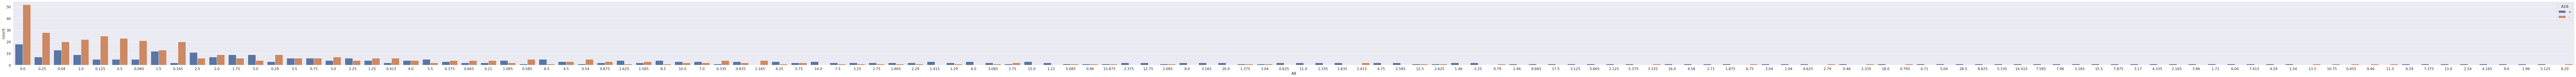

In [ ]:
plt.subplots(figsize = (200,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A9

In [ ]:
print(dataset['A9'].value_counts())

t    361
f    329
Name: A9, dtype: int64


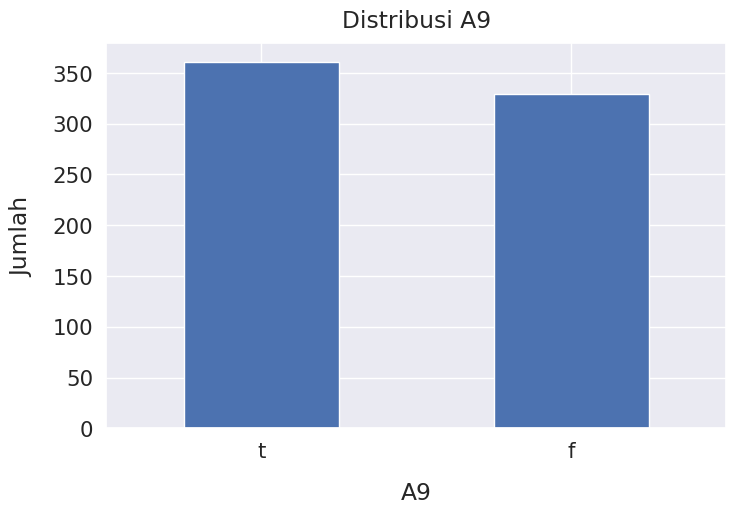

In [ ]:
sns.set(font_scale=1.4)
dataset['A9'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("A9", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A9", y=1.02);

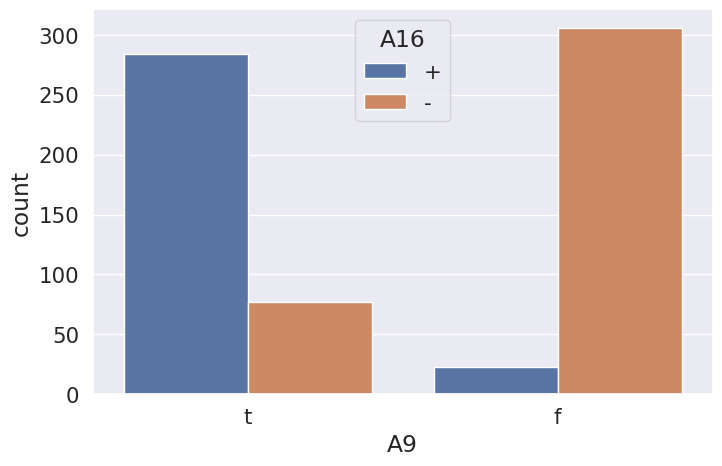

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A10

In [ ]:
print(dataset['A10'].value_counts())

f    395
t    295
Name: A10, dtype: int64


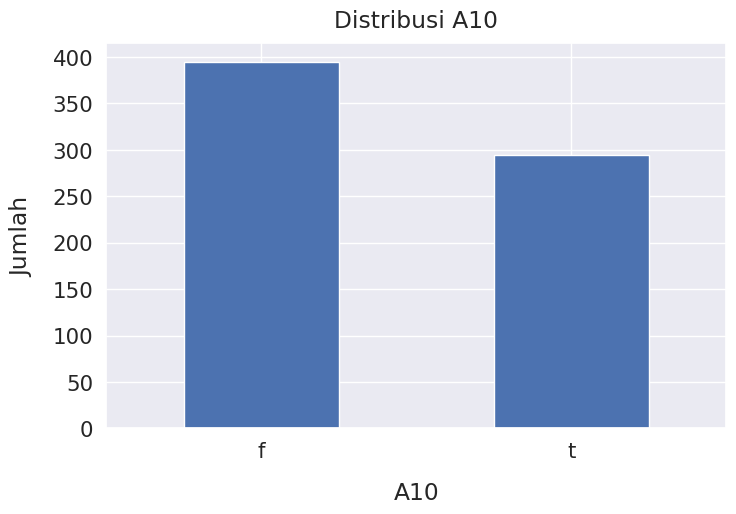

In [ ]:
sns.set(font_scale=1.4)
dataset['A10'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("A10", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A10", y=1.02);

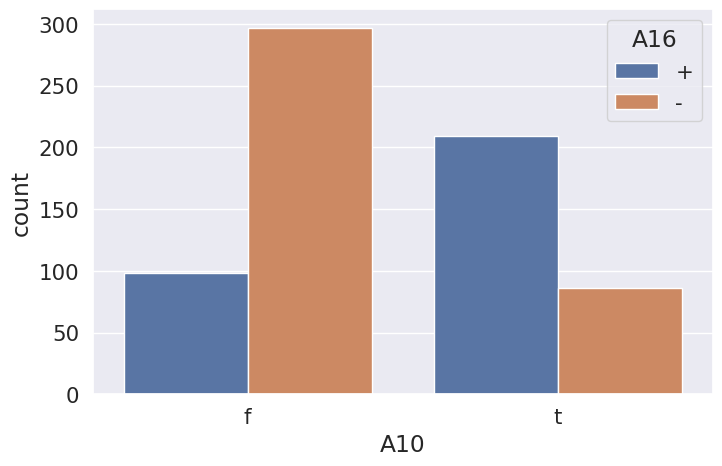

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A11

In [ ]:
print(dataset['A11'].value_counts())

0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8
14      8
12      8
15      4
16      3
20      2
17      2
23      1
40      1
67      1
13      1
19      1
Name: A11, dtype: int64


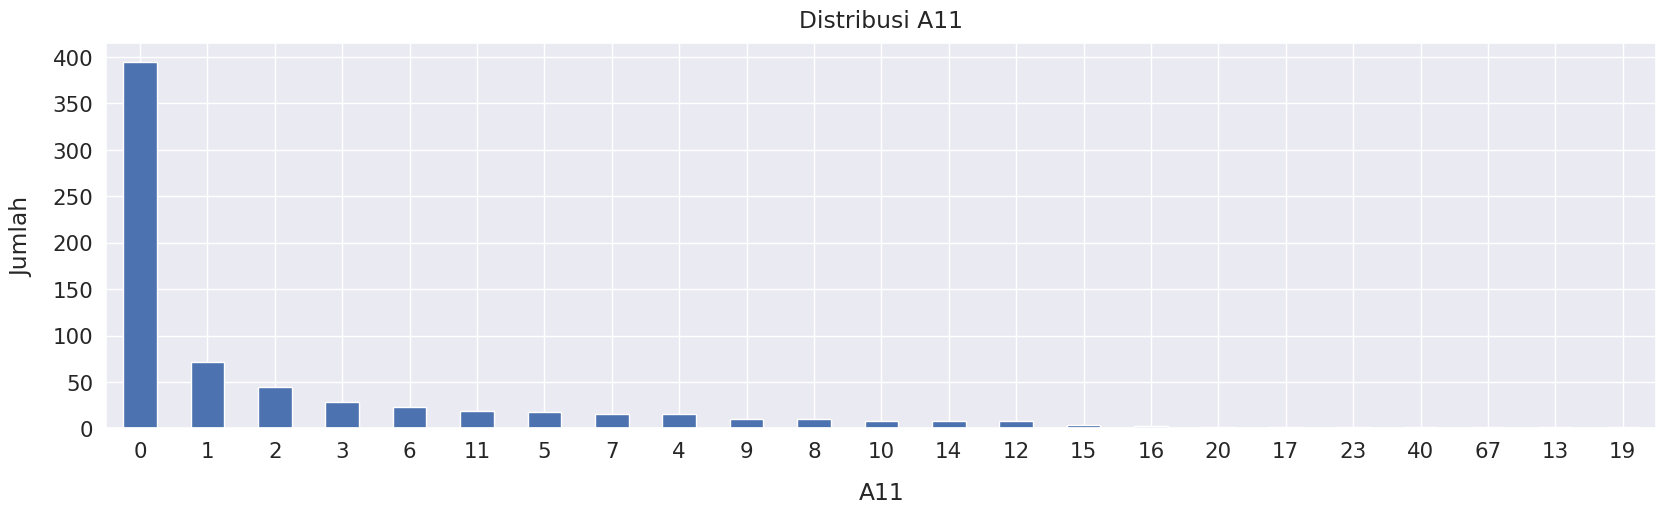

In [ ]:
sns.set(font_scale=1.4)
dataset['A11'].value_counts().plot(kind='bar', figsize=(20, 5), rot=0)
plt.xlabel("A11", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A11", y=1.02);

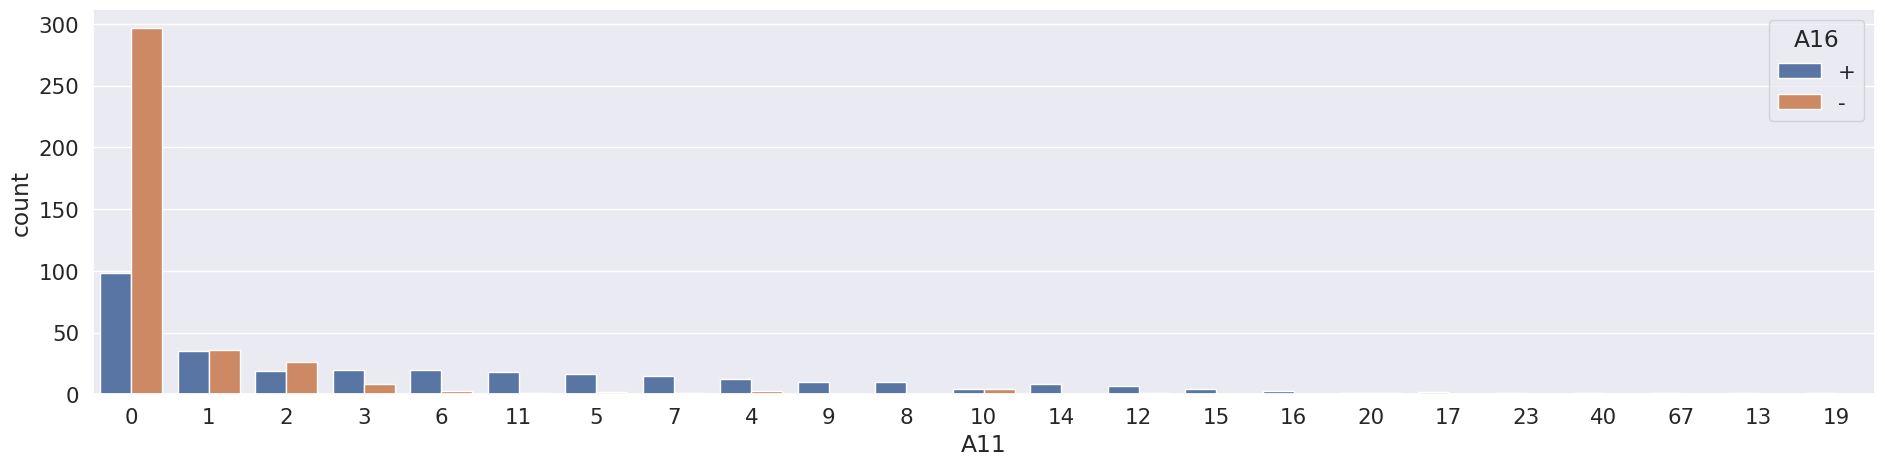

In [ ]:
plt.subplots(figsize = (23,5))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A12

In [ ]:
print(dataset['A12'].value_counts())

f    374
t    316
Name: A12, dtype: int64


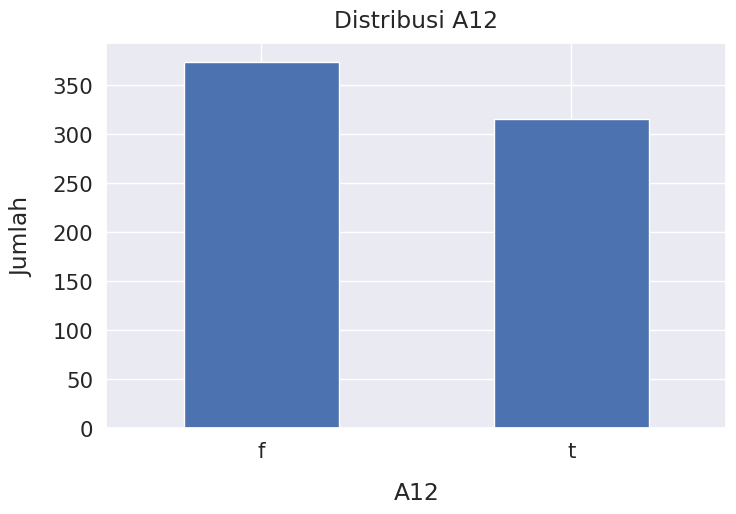

In [ ]:
sns.set(font_scale=1.4)
dataset['A12'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("A12", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A12", y=1.02);

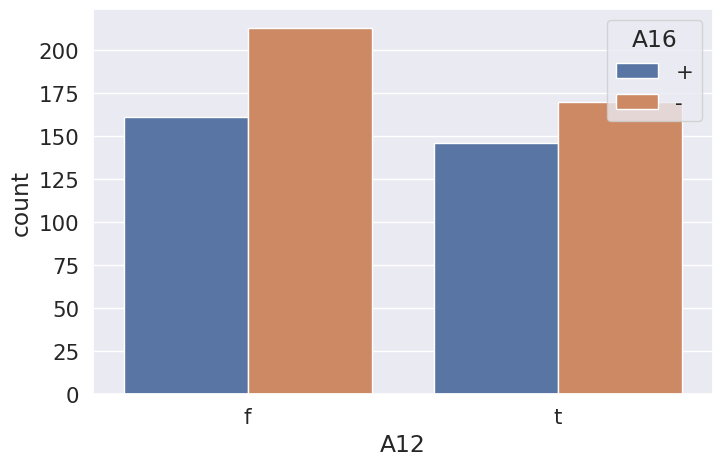

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A13

In [ ]:
print(dataset['A13'].value_counts())

g    625
s     57
p      8
Name: A13, dtype: int64


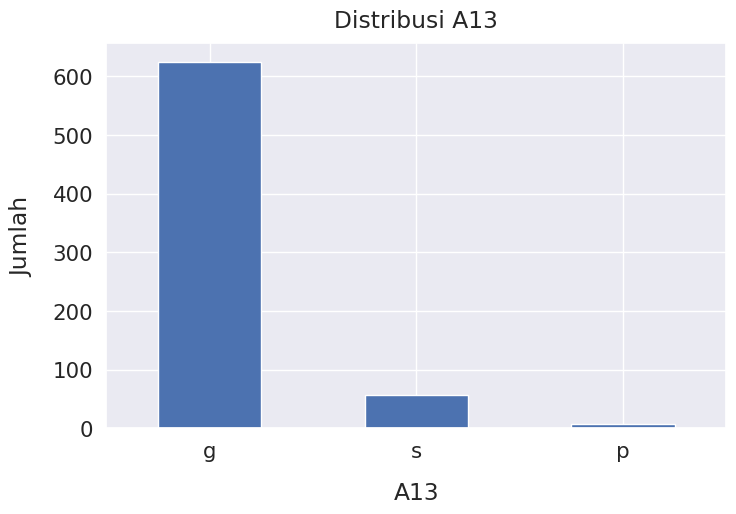

In [ ]:
sns.set(font_scale=1.4)
dataset['A13'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("A13", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A13", y=1.02);

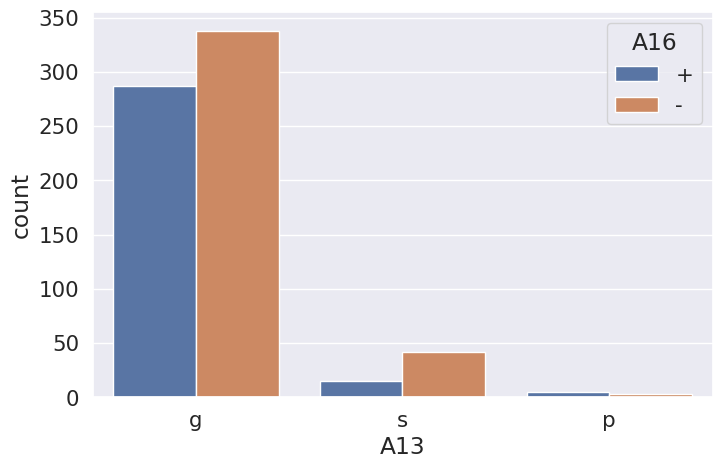

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Distribusi A14

In [ ]:
print(dataset['A14'].value_counts())

00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: A14, Length: 171, dtype: int64


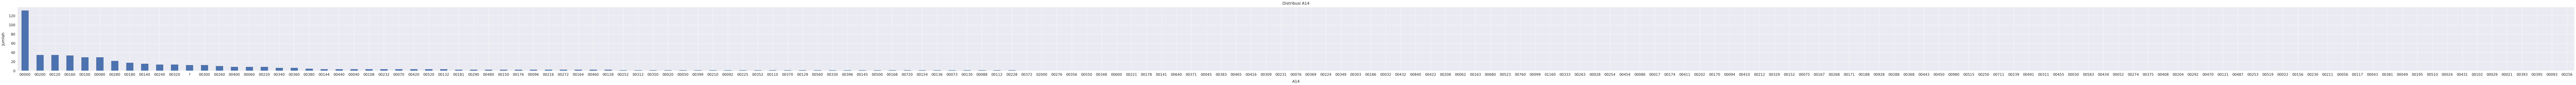

In [ ]:
sns.set(font_scale=1.4)
dataset['A14'].value_counts().plot(kind='bar', figsize=(200, 5), rot=0)
plt.xlabel("A14", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A14", y=1.02);

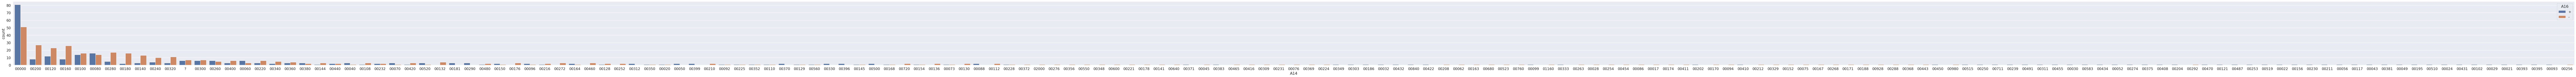

In [ ]:
plt.subplots(figsize = (200,5))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['A16'])
plt.show()

## Cek Distribusi A15

In [ ]:
print(dataset['A15'].value_counts())

0       295
1        29
500      10
1000     10
2         9
       ... 
1704      1
857       1
6700      1
2503      1
750       1
Name: A15, Length: 240, dtype: int64


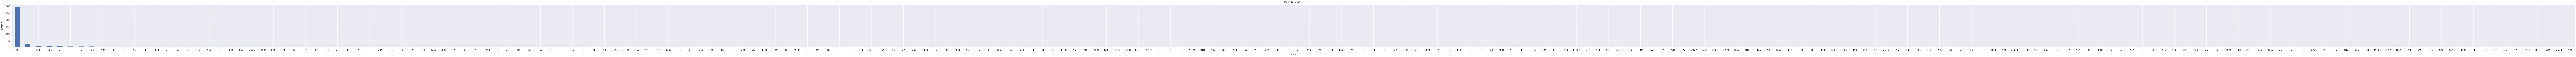

In [ ]:
sns.set(font_scale=1.4)
dataset['A15'].value_counts().plot(kind='bar', figsize=(300, 5), rot=0)
plt.xlabel("A15", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A15", y=1.02);

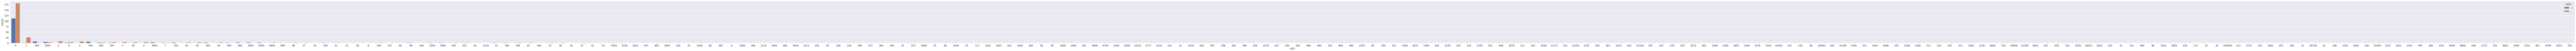

In [ ]:
plt.subplots(figsize = (300,5))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['A16'])
plt.show()

# Cek Korelasi Tahap 1

<ipython-input-59-3fa0eebc40e2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


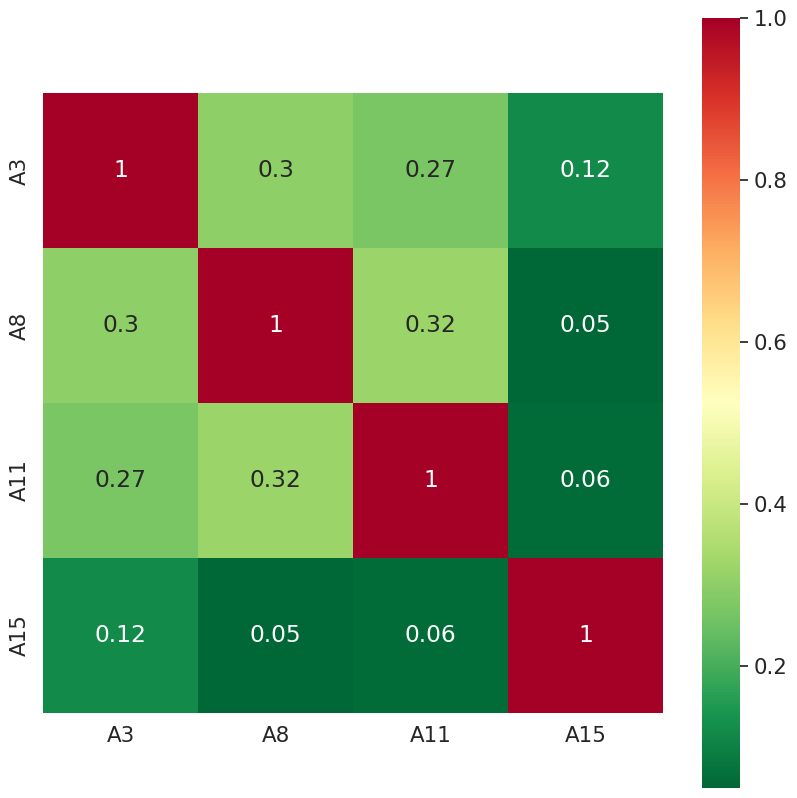

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# BAB 3 - Memvalidasi Data

Temuan :
- Masih adanya missing value
- Masih ada data yang berbentuk object dan harus di ubah ke dalam bentuk numerik
- Beberapa atribut tidak keluar (A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16)

## BAB 4-Menentukan Object Data

**Temuan :**

| Nama | Deskripsi |
|------|-----------|
|  A1  |  Atribut  |
|  A2  |  Atribut  |
|  A3  |  Atribut  |
|  A4  |  Atribut  |
|  A5  |  Atribut  |
|  A6  |  Atribut  |
|  A7  |  Atribut  |
|  A8  |  Atribut  |
|  A9  |  Atribut  |
|  A10 |  Atribut  |
|  A11 |  Atribut  |
|  A12 |  Atribut  |
|  A13 |  Atribut  |
|  A14 |  Atribut  |
|  A15 |  Atribut  |
|  **A16** |  **Label** |

# BAB 5 - Membersihkan Data

Memperbaiki nilai yang hilang

In [ ]:
dataset.replace("?", np.nan, inplace= True)

## Cek bentuk DataSet

In [ ]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [ ]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

A1 : ['b' 'a' nan]
A4 : ['u' 'y' nan 'l']
A5 : ['g' 'p' nan 'gg']
A6 : ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
A7 : ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
A9 : ['t' 'f']
A10 : ['t' 'f']
A12 : ['f' 't']
A13 : ['g' 's' 'p']
A16 : ['+' '-']


Memperbaiki nilai yang hilang

In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14'], dtype='object')

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A14    1.884058
dtype: float64

**Temuan :**

<Axes: >

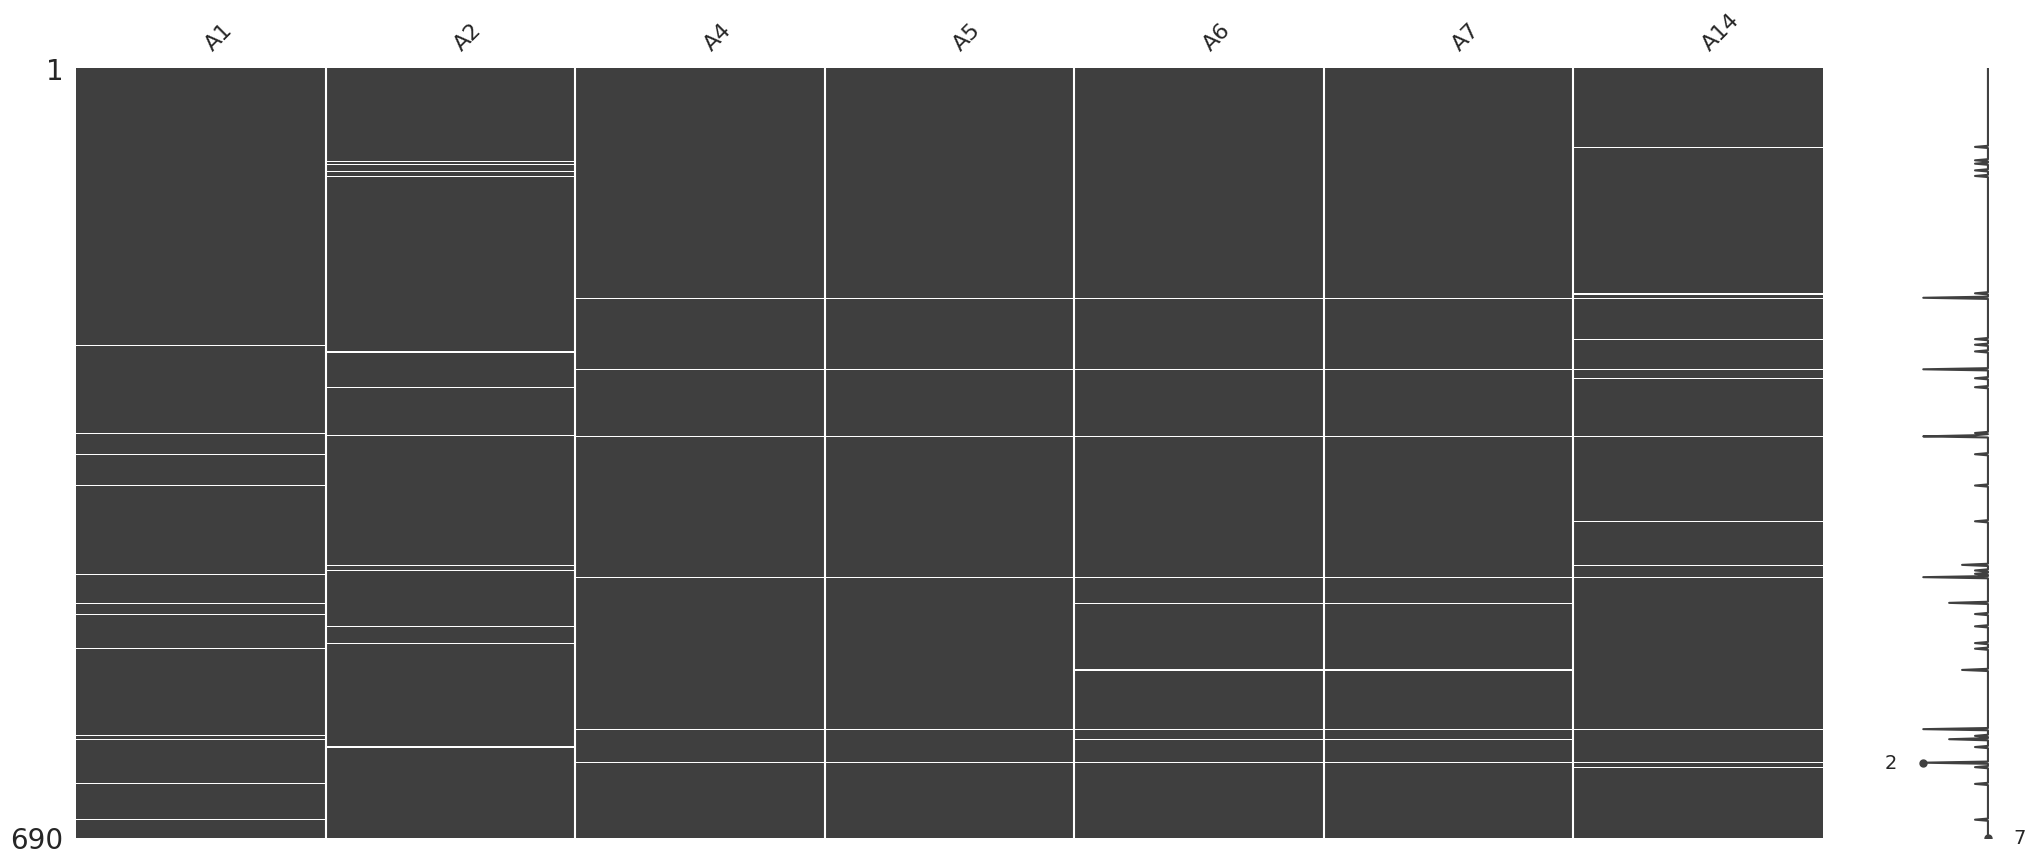

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
A1 = {'b':1, 'a':0}
dataset['A1'] = dataset['A1'].map(A1)

A4 = {'u':1, 'y':2, 'l':3}
dataset['A4'] = dataset['A4'].map(A4)

A5 = {'g':1, 'p':2, 'gg':3}
dataset['A5'] = dataset['A5'].map(A5)

A6 = {'w':1, 'q':2, 'm':3, 'r':4, 'cc':5, 'k':6, 'c':7, 'd':8, 'x':9, 'i':10, 'e':11, 'aa':12, 'ff':13, 'j':14}
dataset['A6'] = dataset['A6'].map(A6)

A7 = {'v':1, 'h':2, 'bb':3, 'ff':4, 'j':5, 'z':6, 'o':7, 'dd':8, 'n':9 }
dataset['A7'] = dataset['A7'].map(A7)

A9 = {'t':1, 'f':0}
dataset['A9'] = dataset['A9'].map(A9)

A10 = {'t':1, 'f':0}
dataset['A10'] = dataset['A10'].map(A10)

A12 = {'t':1, 'f':0}
dataset['A12'] = dataset['A12'].map(A12)

A13 = {'g':1, 's':2, 'p':3}
dataset['A13'] = dataset['A13'].map(A13)


In [ ]:
# Perbaiki A1
median_value=dataset['A1'].median()
dataset['A1']=dataset['A1'].fillna(median_value)

# Perbaiki A2
median_value=dataset['A2'].median()
dataset['A2']=dataset['A2'].fillna(median_value)

# Perbaiki A4
median_value=dataset['A4'].median()
dataset['A4']=dataset['A4'].fillna(median_value)

# Perbaiki A5
median_value=dataset['A5'].median()
dataset['A5']=dataset['A5'].fillna(median_value)

# Perbaiki A6
median_value=dataset['A6'].median()
dataset['A6']=dataset['A6'].fillna(median_value)

# Perbaiki A7
median_value=dataset['A7'].median()
dataset['A7']=dataset['A7'].fillna(median_value)

# Perbaiki A14
median_value=dataset['A14'].median()
dataset['A14']=dataset['A14'].fillna(median_value)



In [ ]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1.0,1.0,1.0,1.0,1.25,1,1,1,0,1,00202,0,+
1,0.0,58.67,4.460,1.0,1.0,2.0,2.0,3.04,1,1,6,0,1,00043,560,+
2,0.0,24.50,0.500,1.0,1.0,2.0,2.0,1.50,1,0,0,0,1,00280,824,+
3,1.0,27.83,1.540,1.0,1.0,1.0,1.0,3.75,1,1,5,1,1,00100,3,+
4,1.0,20.17,5.625,1.0,1.0,1.0,1.0,1.71,1,0,0,0,2,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,2.0,2.0,11.0,2.0,1.25,0,0,0,0,1,00260,0,-
686,0.0,22.67,0.750,1.0,1.0,7.0,1.0,2.00,0,1,2,1,1,00200,394,-
687,0.0,25.25,13.500,2.0,2.0,13.0,4.0,2.00,0,1,1,1,1,00200,1,-
688,1.0,17.92,0.205,1.0,1.0,12.0,1.0,0.04,0,0,0,0,1,00280,750,-


cek kembali

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    float64
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    float64
 4   A5      690 non-null    float64
 5   A6      690 non-null    float64
 6   A7      690 non-null    float64
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(7), int64(6), object(3)
memory usage: 86.4+ KB


# BAB 6 - Merubah tipe data Object menjadi Float

In [ ]:
dataset['A1'] = dataset['A1'].astype(float).astype(int)
dataset['A2'] = dataset['A2'].astype(str).astype(float)
dataset['A4'] = dataset['A4'].astype(float).astype(int)
dataset['A5'] = dataset['A5'].astype(float).astype(int)
dataset['A6'] = dataset['A6'].astype(float).astype(int)
dataset['A7'] = dataset['A7'].astype(float).astype(int)
dataset['A14'] = dataset['A14'].astype(str).astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(11), object(1)
memory usage: 86.4+ KB


In [ ]:
dataset.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,1.242029,1.242029,6.960870,1.847826,2.223406,0.523188,0.427536,2.40000,0.457971,1.105797,183.562319,1017.385507
std,0.460464,11.860245,4.978163,0.435342,0.435342,3.802822,1.395110,3.346513,0.499824,0.495080,4.86294,0.498592,0.343458,172.190278,5210.102598
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,3.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,1.000000,80.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,160.000000,5.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,10.000000,2.000000,2.625000,1.000000,1.000000,3.00000,1.000000,1.000000,272.000000,395.500000
max,1.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100000.000000


# Menghapus Nilai Yang Bernilai Konstan

In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(11), object(1)
memory usage: 86.4+ KB


# Cek Korelasi

<ipython-input-78-897262e3542f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


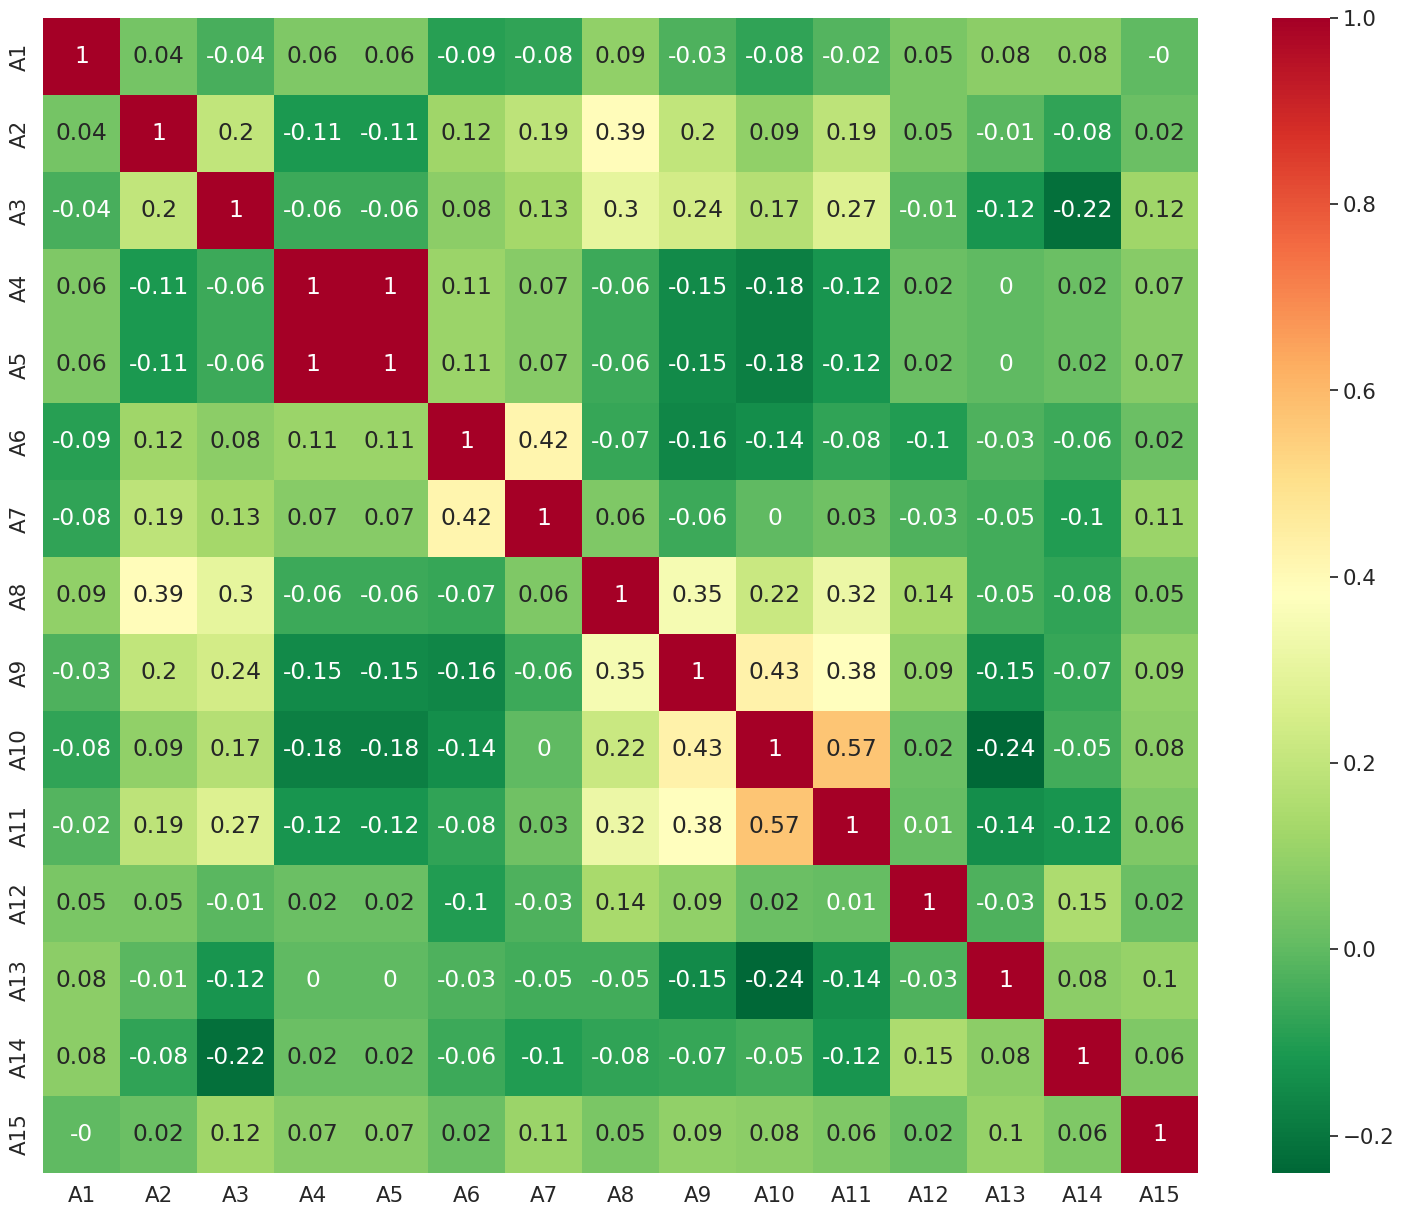

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
dataset.drop(['A4'], axis="columns", inplace=True)

### cek boxplot

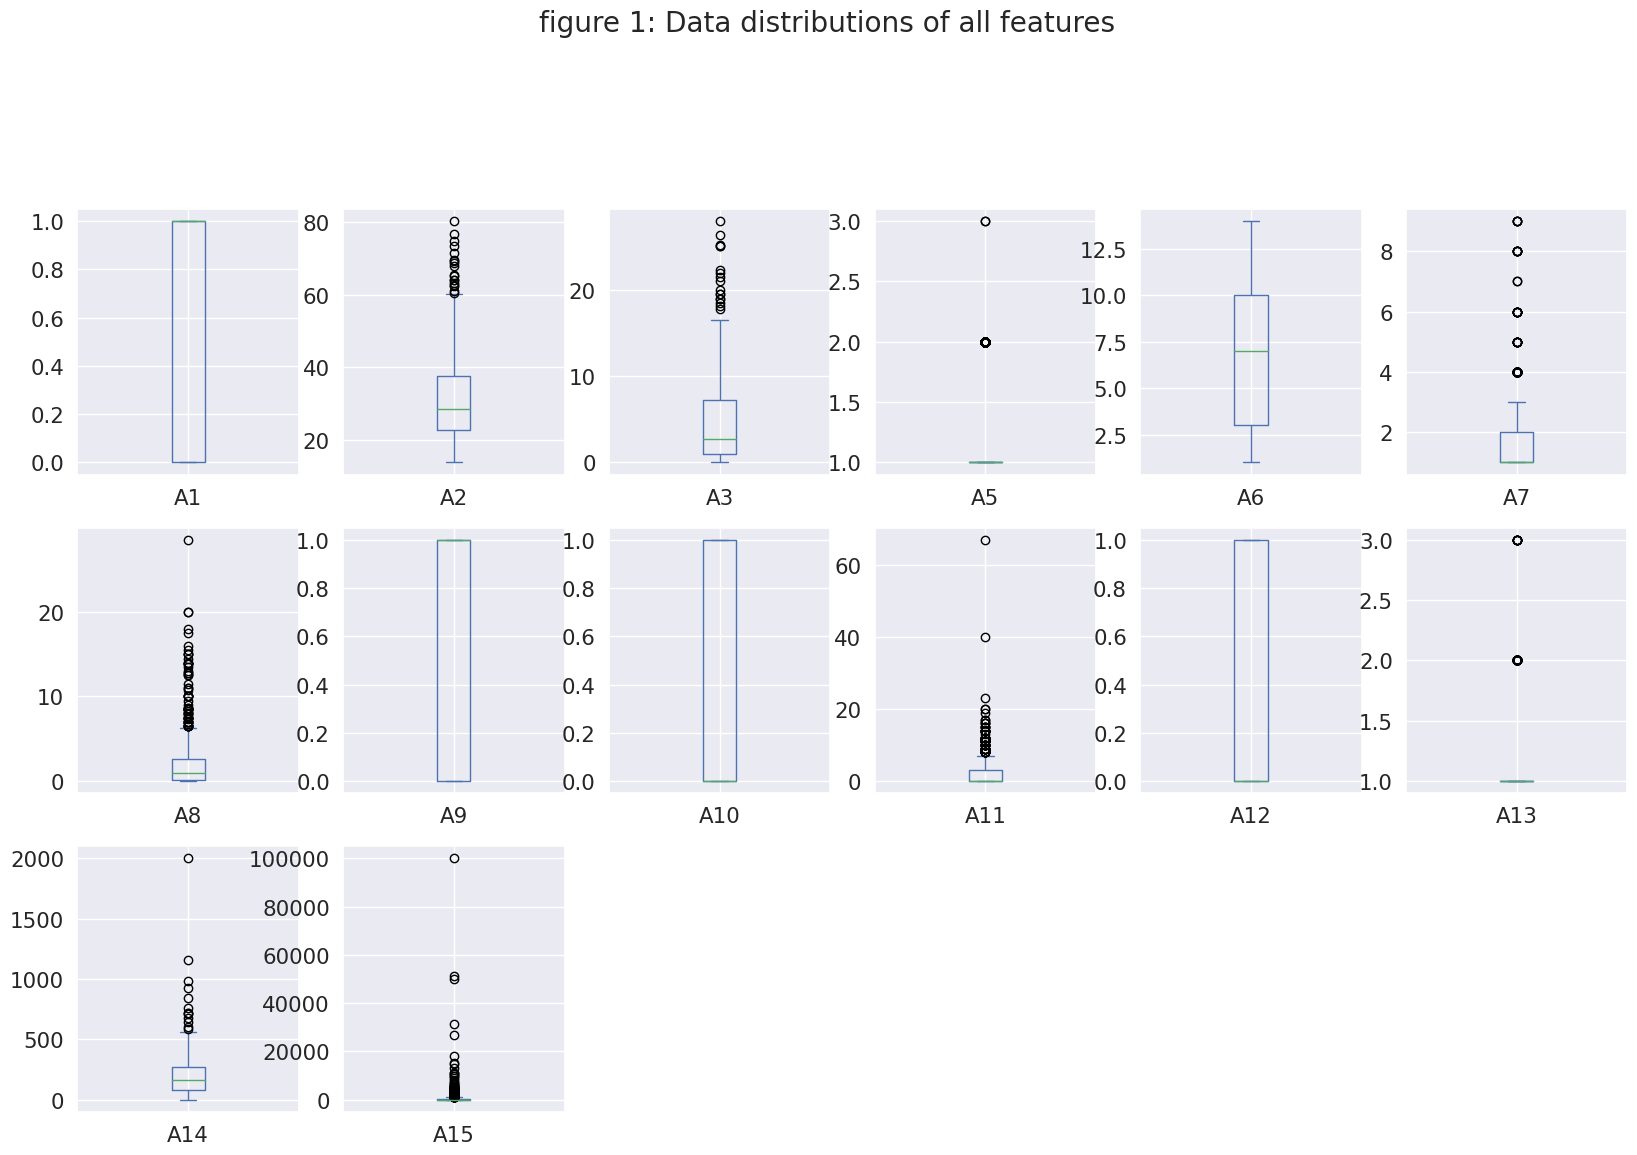

In [ ]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

# BAB 7 - Menentukan Label Data

In [ ]:
y = dataset['A16']

In [ ]:
y

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: A16, Length: 690, dtype: object

In [ ]:
x = dataset.drop(['A16'], 1)

<ipython-input-83-849e2cdf4308>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = dataset.drop(['A16'], 1)


In [ ]:
x

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,1,1,1,1.25,1,1,1,0,1,202.0,0
1,0,58.67,4.460,1,2,2,3.04,1,1,6,0,1,43.0,560
2,0,24.50,0.500,1,2,2,1.50,1,0,0,0,1,280.0,824
3,1,27.83,1.540,1,1,1,3.75,1,1,5,1,1,100.0,3
4,1,20.17,5.625,1,1,1,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,11,2,1.25,0,0,0,0,1,260.0,0
686,0,22.67,0.750,1,7,1,2.00,0,1,2,1,1,200.0,394
687,0,25.25,13.500,2,13,4,2.00,0,1,1,1,1,200.0,1
688,1,17.92,0.205,1,12,1,0.04,0,0,0,0,1,280.0,750


# Perlakuan Data Original

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=2023)

# Perlakuan Data Normal


In [ ]:
x_norm = StandardScaler().fit_transform(x)

In [ ]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm,y, test_size=0.5, random_state=2023)

## BAB 8 - Membangun Model


Menggunakan Decision Tree

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

# Pemodelan Data Original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A5      690 non-null    int64  
 4   A6      690 non-null    int64  
 5   A7      690 non-null    int64  
 6   A8      690 non-null    float64
 7   A9      690 non-null    int64  
 8   A10     690 non-null    int64  
 9   A11     690 non-null    int64  
 10  A12     690 non-null    int64  
 11  A13     690 non-null    int64  
 12  A14     690 non-null    float64
 13  A15     690 non-null    int64  
 14  A16     690 non-null    object 
dtypes: float64(4), int64(10), object(1)
memory usage: 81.0+ KB


In [ ]:
ori_classifier_dt.fit(x_train,y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=15,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 15
model__min_samples_split: 2
model__random_state: 42


# Pemodelan Data Normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(x_train_norm,y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=11,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 4
model__min_samples_leaf: 11
model__min_samples_split: 2
model__random_state: 42


# BAB 9 - Mengevaluasi Hasil Pemodelan

Evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(x_train)

ori_accuracy_dt_train = accuracy_score(y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(x_test)

ori_accuracy_dt_test = accuracy_score(y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.8724637681159421
Precision pada training set:  0.8724637681159421
Recall pada training set:  0.8724637681159421
Akurasi pada test set:  0.8579710144927536
Precision pada test set:  0.8579710144927536
Recall pada test set:  0.8579710144927536


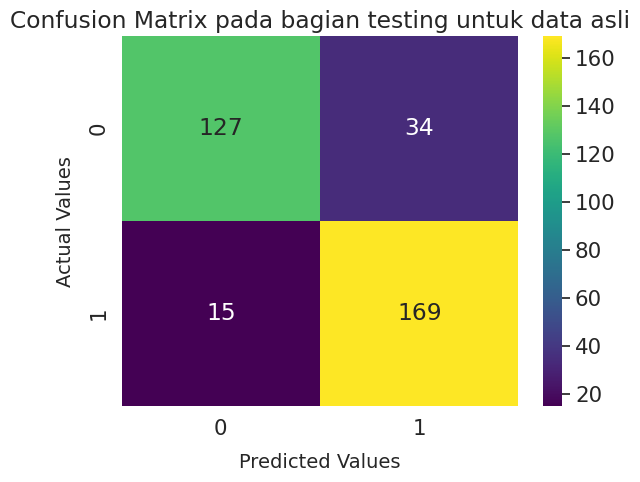

In [ ]:
sns.heatmap(confusion_matrix(y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

Evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(x_train_norm)

norm_accuracy_dt_train = accuracy_score(y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(x_test_norm)

norm_accuracy_dt_test = accuracy_score(y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8724637681159421
Precision pada training set:  0.8724637681159421
Recall pada training set:  0.8724637681159421
Akurasi pada test set:  0.8579710144927536
Precision pada test set:  0.8579710144927536
Recall pada test set:  0.8579710144927536


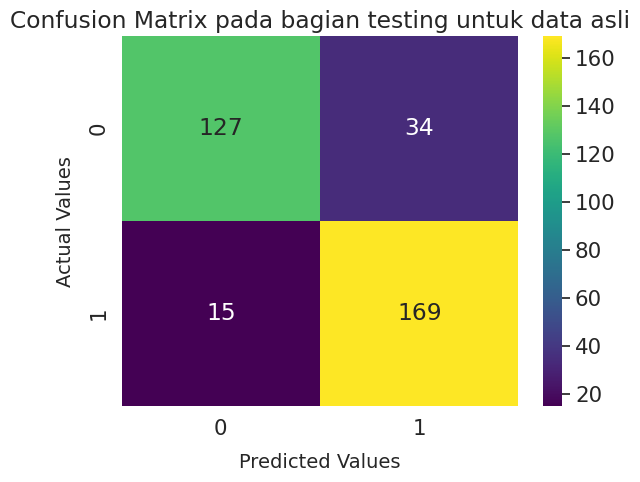

In [ ]:
sns.heatmap(confusion_matrix(y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),

         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.872464,0.857971
1,Machine Learning Data Normalisasi,0.872464,0.857971


In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),

                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.857971,0.857971,0.857971
1,Machine Learning Data Normalisasi,0.857971,0.857971,0.857971


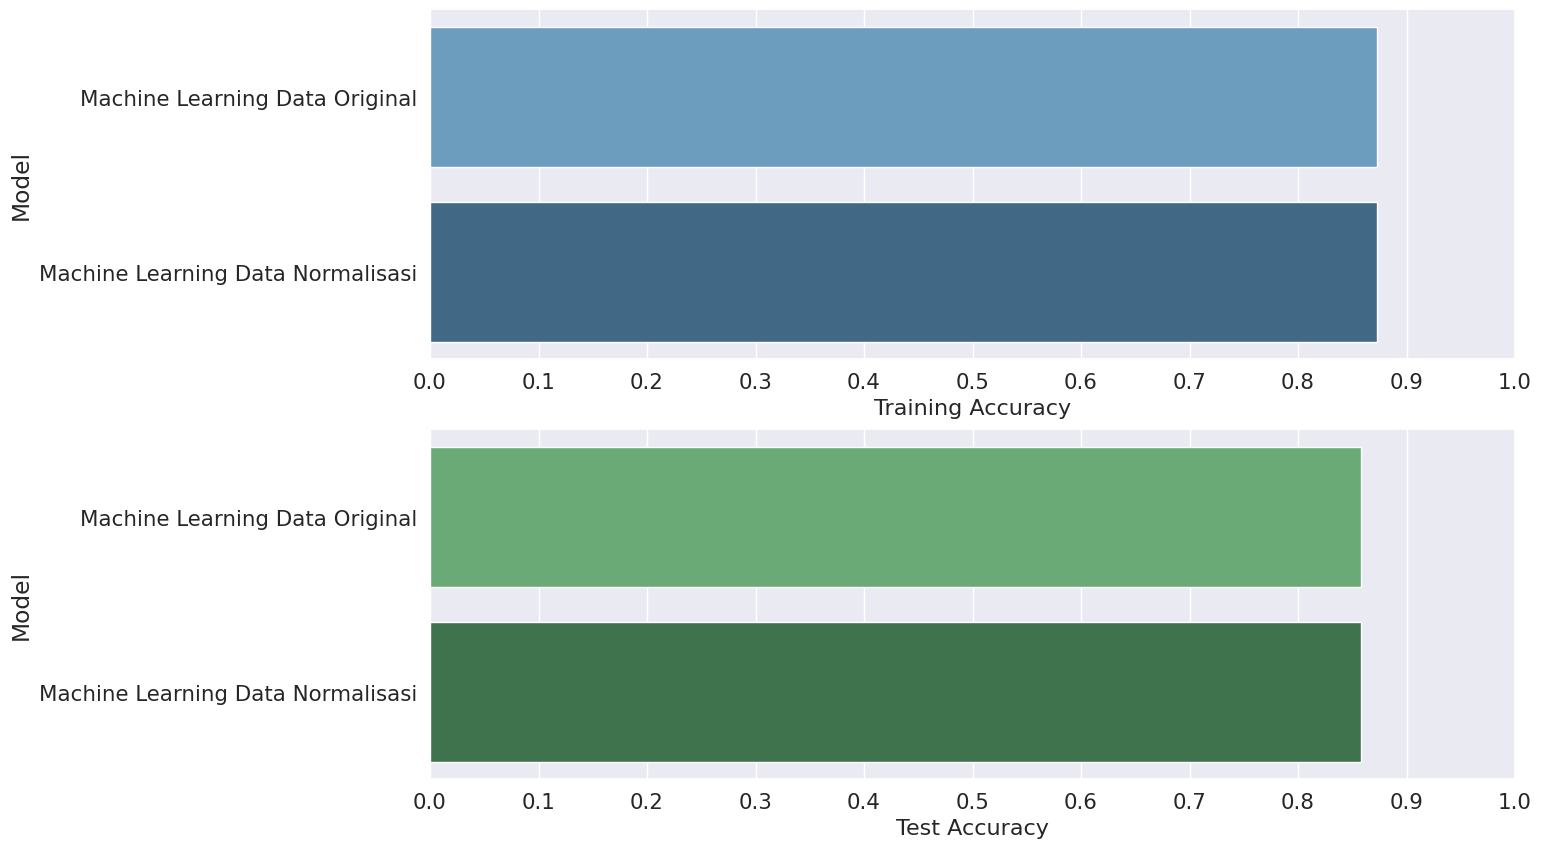

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [ ]:
from sklearn import tree

In [ ]:
def Analize_Feature(model,x_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(x_test.columns))
    for name, importance in zip(x_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,x_test)

   name      coef
7    A9  0.743535
8   A10  0.146832
12  A14  0.069226
2    A3  0.020717
13  A15  0.019690
0    A1  0.000000
1    A2  0.000000
3    A5  0.000000
4    A6  0.000000
5    A7  0.000000
6    A8  0.000000
9   A11  0.000000
10  A12  0.000000
11  A13  0.000000


,name,coef
0,A1,0.000000
1,A2,0.000000
2,A3,0.020717
3,A5,0.000000
4,A6,0.000000
5,A7,0.000000
6,A8,0.000000
7,A9,0.743535
8,A10,0.146832
9,A11,0.000000


[Text(0.4230769230769231, 0.875, 'x[7] <= 0.5\ngini = 0.488\nsamples = 345\nvalue = [146, 199]'),
 Text(0.15384615384615385, 0.625, 'x[2] <= 0.168\ngini = 0.127\nsamples = 161\nvalue = [11, 150]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.23076923076923078, 0.375, 'x[12] <= 285.0\ngini = 0.079\nsamples = 145\nvalue = [6, 139]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.033\nsamples = 119\nvalue = [2, 117]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.6923076923076923, 0.625, 'x[8] <= 0.5\ngini = 0.391\nsamples = 184\nvalue = [135, 49]'),
 Text(0.5384615384615384, 0.375, 'x[12] <= 110.0\ngini = 0.499\nsamples = 71\nvalue = [34, 37]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.444\nsamples = 48\nvalue = [16, 32]'),
 Text(0.8461538461538461, 0.375, 'x[13] <= 148.5\ngini = 0.19\nsamples = 113\nvalue = [101, 12]'),


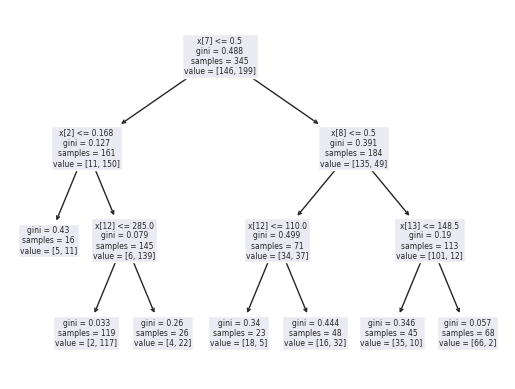

In [ ]:
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"])

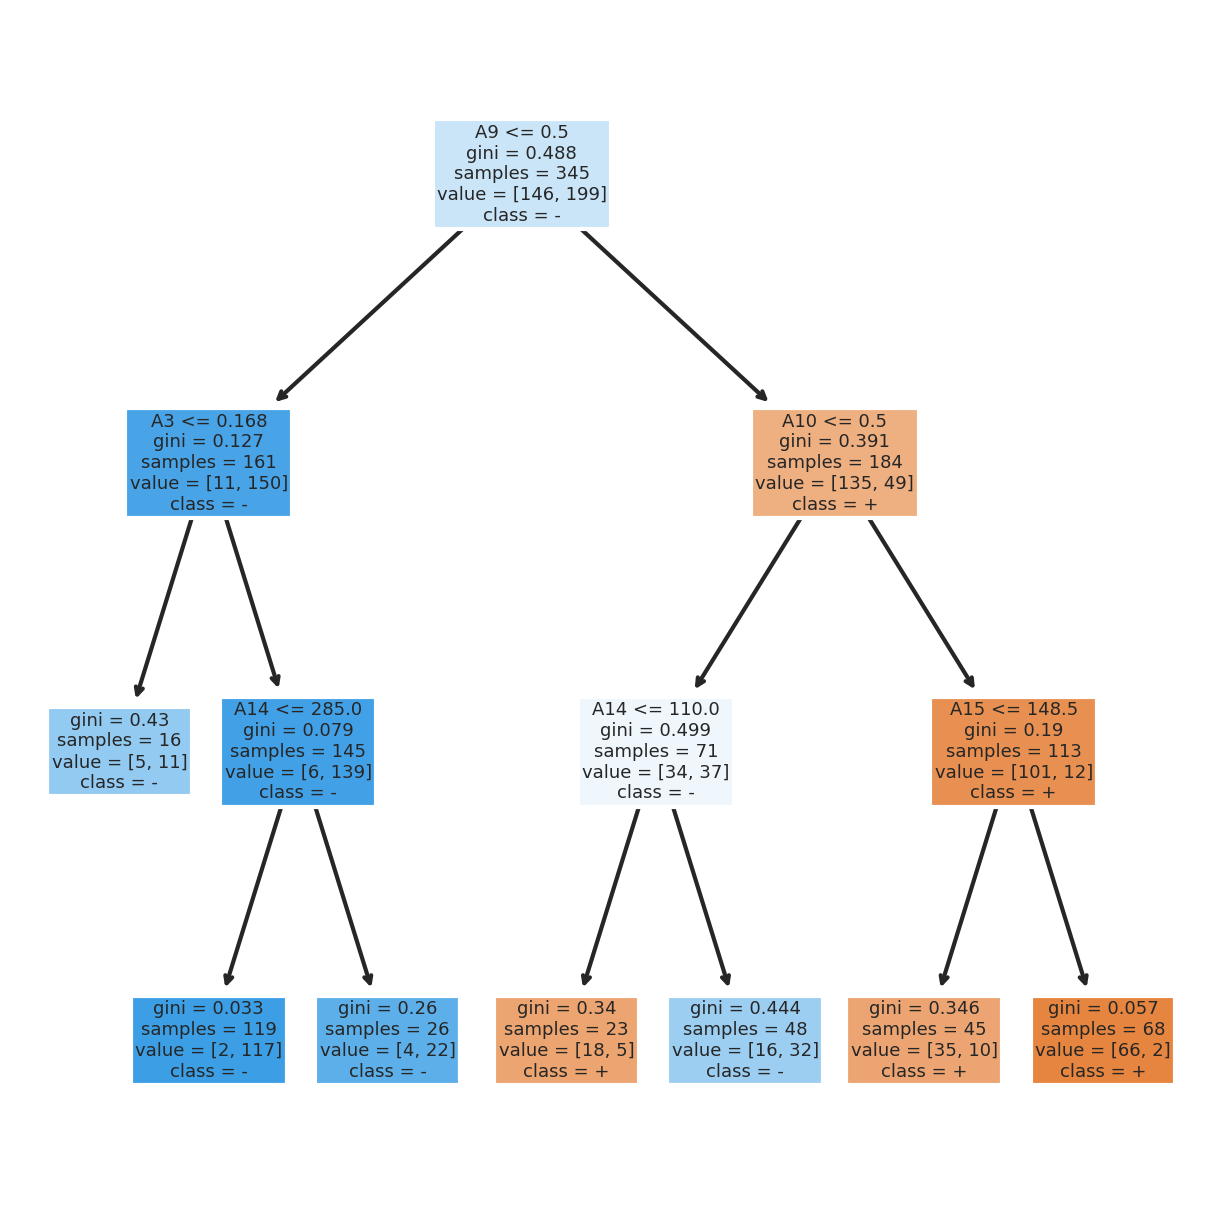

In [ ]:
fn=["A1","A2","A3","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
cn=['+', '-']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300) #
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')